<a href="https://colab.research.google.com/github/khanrasanju420/Bike-shearing-Demand-Prediction/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Seoul Bike Sharing Demand Prediction



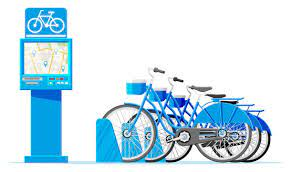

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member  -** SANJU KHANRA


# **Project Summary -**



This projest presents a rule-based regression predictive model for bike sharing demand prediction. A bike-sharing system provides people with a sustainable mode of transportation and has beneficial effects for both the environment and the user. In recent days, Pubic rental bike sharing is becoming popular because of is increased comfortableness and environmental sustainability. Data used include Seoul Bike and Capital Bikeshare program data. Data have weather data associated with it for each hour. For the dataset, we are using linear regression model were train with optimize hyperparameters using a repeated cross validation approach and testing set is used for evaluation. Multiple evaluation indices such as 𝑅 2 , Root Mean Square error are use to measure the prediction performance of the regression models. The performance of the model is vary with the time interval used in transforming data.

The increased usage of private vehicles in metropolitan areas has resulted in significant rise in fuel consumption’s that have adverse effect on the climate. It has led people in today’s society to accept problems like road traffic as the norm. Therefore the government and organzations started adopting measures to facilitate sustainable development to address the issue. Many countries have bike sharing system, such as bike sharing system in South Korea, which started to overcome all this issues and to develop a healthy environment for citizen of Seoul to live. In that context, the Bike Share initiative was launched to tackle the public mobility problem. It provided the people with an alternative to using a sustainable mode of transport for a small distance at a minimal cost. And gave people the freedom to utilize the service by themselves. In a bike-share system, a user could lend a bike from any bike stations and return it to a bike station near the destination and since it involves the activity of pedalling the bike it has beneficial health effects. And the city-wide installation of bike stations improved the accessibility of areas by bikes. Docking stations are computerized stands for the purpose of pickup and drop off of the rental bikes. Users of public bikes can rent and return rental bikes at any docking station. With this kind of smart technology and convenience, the use of Rental bike is increasing every day. So, there is a need to manage the bike rental demand and manage the continuous and convenient service for the users. This study proposes a data mining based approach including weather data to predict whole city public bike demand. A rule-based model is used to predict the number of rental bikes needed at each hour.



# **GitHub Link -**

https://github.com/khanrasanju420/Bike-shearing-Demand-Prediction

# **Problem Statement**



Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd     #(provides wide variety tools for data analysis,many inbuilt methods for grouping,)
                         #(combining and filtering data.)
    
import numpy as np      #for some basic mathematical operations

from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations

import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import tree
from sklearn.ensemble import BaggingRegressor


import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Seoul_Bike_Sharing_Demand_Prediction/SeoulBikeData.csv"
bike_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Seoul_Bike_Sharing_Demand_Prediction/SeoulBikeData.csv",encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
bike_df.head()

In [ ]:
bike_df.tail()

In [ ]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_df.shape
     

In [ ]:
print(f'There are {bike_df.shape[0]} Rows and {bike_df.shape[1]} Columns in the dataset')
     

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Duplicate entry in dataset is :",bike_df.duplicated().sum())
     

**Not found any duplicated entries inside the dataset**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

**In this dataframe NaN value is not present**

In [ ]:
# Visualizing the missing values
bike_df.isna().sum()

In [ ]:
pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
     

In [ ]:
pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
     


In [ ]:
missing = pd.DataFrame((bike_df.isnull().mean())*100).reset_index()
plt.figure(figsize=(8,3))
ax = sns.pointplot(data=missing,x="index",y=0)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**Not found any missing values inside the dataset** 

### What did you know about your dataset?

In [ ]:
# Custom Function for Dtype,Unique values and Null values
def bike_df_info():
    bike = pd.DataFrame(index=bike_df.columns)
    bike['DataType'] = bike_df.dtypes
    bike["Non-null_Values"] = bike_df.count()
    bike['Unique_Values'] = bike_df.nunique().sort_values(ascending=True)
    bike['NaN_Values'] = bike_df.isnull().sum()
    bike['NaN_Values_Percentage'] = (bike['NaN_Values']/len(bike_df))*100 
    return bike

In [ ]:
# Custom Function
bike_df_info()

# Finding details from data:

1. There are 14 features with 8760 rows of data.
2. There are 4 categorical columns and 10 numerical columns. Columns ‘Date’, ‘Seasons’ and ‘Functioning Day’ are of 𝑜𝑏𝑗𝑒𝑐𝑡 data type
3. Columns ‘Rented Bike Count’, ‘Hour’, ‘Humidity (%)' and ‘Visibility (10𝑚)' are of 𝑖𝑛𝑡64 numarical data type
4. olumns ‘Temperature Temperature (℃)’, ‘Wind Speed (𝑚/𝑠)’, ‘Dew Point Temperature (℃)’,‘Solar Radiation (𝑀𝐽/𝑚2)’,‘Rainfall (𝑚𝑚)' and ‘Snowfall(𝑐𝑚) are of 𝑓𝑙𝑜𝑎𝑡64 numarical data type
5. Not any null value present in any column
6. Unique count : Seasons- 4 , Holiday- 2 , Functioning Day- 2, Date-365, Rented Bike Count-2166, Hour-24, Temperature(°C)-546 etc.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Features of the dataset:")
bike_df.columns
     

In [ ]:
# Dataset Describe
bike_df.describe().T      #.T use for transpose the describe table

### Variables Description 

**Breakdown of Our Features:**

**Date :** The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count :** Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour:** The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C):** Temperature in Celsius, type : Float

**Humidity(%):** Humidity in the air in %, type : int

**Wind speed (m/s) :** Speed of the wind in m/s, type : Float

**Visibility (10m):** Visibility in m, type : int

**Dew point temperature(°C):** Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2):** Sun contribution, type : Float

**Rainfall(mm):** Amount of raining in mm, type : Float

**Snowfall (cm):** Amount of snowing in cm, type : Float

**Seasons:** Season of the year, type : str, there are only 4 season's in data .

**Holiday:** If the day is holiday period or not, type: str

**Functioning Day:** If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

**Checking the possible values important and meaningful categorical columns can have**

In [ ]:
# Check Unique Values for each variable.
print(bike_df["Seasons"].unique())
     

In [ ]:
print(bike_df["Holiday"].unique())

In [ ]:
print(bike_df["Functioning Day"].unique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***